In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import spacy
import numpy as np
from sklearn.cluster import KMeans

# Initialize SpaCy and load the model
nlp = spacy.load("en_core_web_md")

# Vocabulary words
words = ["unwonted",  "caparisoned", "innocuous", "capitulation", 
         "flout", "impunity", "sine qua non", "vitriolic", 
         "eschewed", 'abjure', 'adulation', 'anachronistic', 'arbiter', 
         'assiduously', 'avarice', "aback", "abate", 
         "abduct", "abhor", "abide", "abjure", "abrogate"]

# Create SpaCy objects for each word
spacy_words = [nlp(word) for word in words]
spacy_words

[unwonted,
 caparisoned,
 innocuous,
 capitulation,
 flout,
 impunity,
 sine qua non,
 vitriolic,
 eschewed,
 abjure,
 adulation,
 anachronistic,
 arbiter,
 assiduously,
 avarice,
 aback,
 abate,
 abduct,
 abhor,
 abide,
 abjure,
 abrogate]

In [30]:
# Create a similarity matrix
similarity_matrix = np.zeros((len(spacy_words), len(spacy_words)))
similarity_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [31]:
for i, word1 in enumerate(spacy_words):
    for j, word2 in enumerate(spacy_words):
        similarity_matrix[i, j] = word1.similarity(word2)
print(similarity_matrix)

[[ 1.          0.44514114  0.35102743  0.33162536  0.33011342  0.17367949
   0.2213456   0.28751082  0.49355831  0.14577273  0.18913465  0.2547772
   0.18073852  0.39574542  0.33989472  0.36628662  0.18773831  0.29079303
   0.41196479  0.13313508  0.14577273  0.33187854]
 [ 0.44514114  1.          0.20064346  0.29368382  0.34207112  0.35396683
   0.01248108  0.17210566  0.35740421  0.34589466  0.11904033  0.22089753
   0.31247153  0.27546197  0.30280685  0.27600953  0.12130254  0.56814439
   0.43856437  0.1465849   0.34589466  0.31371851]
 [ 0.35102743  0.20064346  1.          0.29740848  0.40958759  0.27911937
   0.30912791  0.26778118  0.24414349  0.23262362  0.32286727  0.311422
   0.14698889  0.43791278  0.30974481  0.38645429  0.38073761  0.32982972
   0.31477401  0.11479759  0.23262362  0.37259926]
 [ 0.33162536  0.29368382  0.29740848  1.          0.32742153  0.38764132
   0.3630457   0.29411768  0.28143151  0.00136678  0.75386379  0.58823305
   0.11982635  0.69198956  0.2107175

In [32]:
similarity_matrix.shape

(22, 22)

In [34]:
import pandas as pd
labels = [f'Word{i}' for i in range(1, 23)]
# Create the DataFrame
df = pd.DataFrame(similarity_matrix, index=labels, columns=labels)
df

,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10,...,Word13,Word14,Word15,Word16,Word17,Word18,Word19,Word20,Word21,Word22
Word1,1.000000,0.445141,0.351027,0.331625,0.330113,0.173679,0.221346,0.287511,0.493558,0.145773,...,0.180739,0.395745,0.339895,0.366287,0.187738,0.290793,0.411965,0.133135,0.145773,0.331879
Word2,0.445141,1.000000,0.200643,0.293684,0.342071,0.353967,0.012481,0.172106,0.357404,0.345895,...,0.312472,0.275462,0.302807,0.276010,0.121303,0.568144,0.438564,0.146585,0.345895,0.313719
Word3,0.351027,0.200643,1.000000,0.297408,0.409588,0.279119,0.309128,0.267781,0.244143,0.232624,...,0.146989,0.437913,0.309745,0.386454,0.380738,0.329830,0.314774,0.114798,0.232624,0.372599
Word4,0.331625,0.293684,0.297408,1.000000,0.327422,0.387641,0.363046,0.294118,0.281432,0.001367,...,0.119826,0.691990,0.210718,0.146091,0.428507,0.289324,0.283894,0.065794,0.001367,0.623813
Word5,0.330113,0.342071,0.409588,0.327422,1.000000,0.394804,0.207002,0.242411,0.223924,0.337872,...,0.389045,0.318413,0.211414,0.207091,0.385841,0.329960,0.561027,0.564520,0.337872,0.588369
Word6,0.173679,0.353967,0.279119,0.387641,0.394804,1.000000,0.087838,0.461382,0.249215,0.290499,...,0.382931,0.373078,0.461479,0.198954,0.348442,0.356770,0.523047,0.129919,0.290499,0.271199
Word7,0.221346,0.012481,0.309128,0.363046,0.207002,0.087838,1.000000,0.117448,0.123935,-0.053872,...,0.040830,0.385239,0.104261,0.086123,0.176629,0.064151,0.081409,0.036265,-0.053872,0.332790
Word8,0.287511,0.172106,0.267781,0.294118,0.242411,0.461382,0.117448,1.000000,0.362666,0.226348,...,0.148791,0.368822,0.374221,0.288852,0.177873,0.214960,0.441089,0.041117,0.226348,0.165050
Word9,0.493558,0.357404,0.244143,0.281432,0.223924,0.249215,0.123935,0.362666,1.000000,0.303573,...,0.090358,0.348485,0.409611,0.467549,0.211194,0.213801,0.423756,0.260687,0.303573,0.222756
Word10,0.145773,0.345895,0.232624,0.001367,0.337872,0.290499,-0.053872,0.226348,0.303573,1.000000,...,0.207667,0.041025,0.405832,0.272882,0.130729,0.331829,0.468827,0.409056,1.000000,0.214570


In [35]:
import pandas as pd

# Assuming df is your DataFrame
# Flatten the DataFrame into a Series
flattened_series = df.unstack()

# Filter out values that are equal to 1
filtered_series = flattened_series[flattened_series != 1]

# Sort the series in descending order and select the top 5 values
top_five_values = filtered_series.sort_values(ascending=False).head(5)

# Display the top five values
print(top_five_values)


Word11  Word4     0.753864
Word4   Word11    0.753864
Word14  Word4     0.691990
Word4   Word14    0.691990
Word22  Word4     0.623813
dtype: float64


In [36]:
# Apply clustering algorithm (K-Means)
n_clusters = 6  # number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(similarity_matrix)
clusters = kmeans.labels_
clusters

C:\Users\asus\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 1, 3, 1, 0, 5, 4, 4, 2, 3, 3, 0, 3, 4, 4, 1, 0, 0, 2, 2, 1])

In [37]:
# Create a graph
G = nx.Graph()

# Add nodes with cluster information
for i, word in enumerate(words):
    print(i,word,clusters[i])
    G.add_node(word, cluster=clusters[i])

0 unwonted 4
1 caparisoned 0
2 innocuous 1
3 capitulation 3
4 flout 1
5 impunity 0
6 sine qua non 5
7 vitriolic 4
8 eschewed 4
9 abjure 2
10 adulation 3
11 anachronistic 3
12 arbiter 0
13 assiduously 3
14 avarice 4
15 aback 4
16 abate 1
17 abduct 0
18 abhor 0
19 abide 2
20 abjure 2
21 abrogate 1


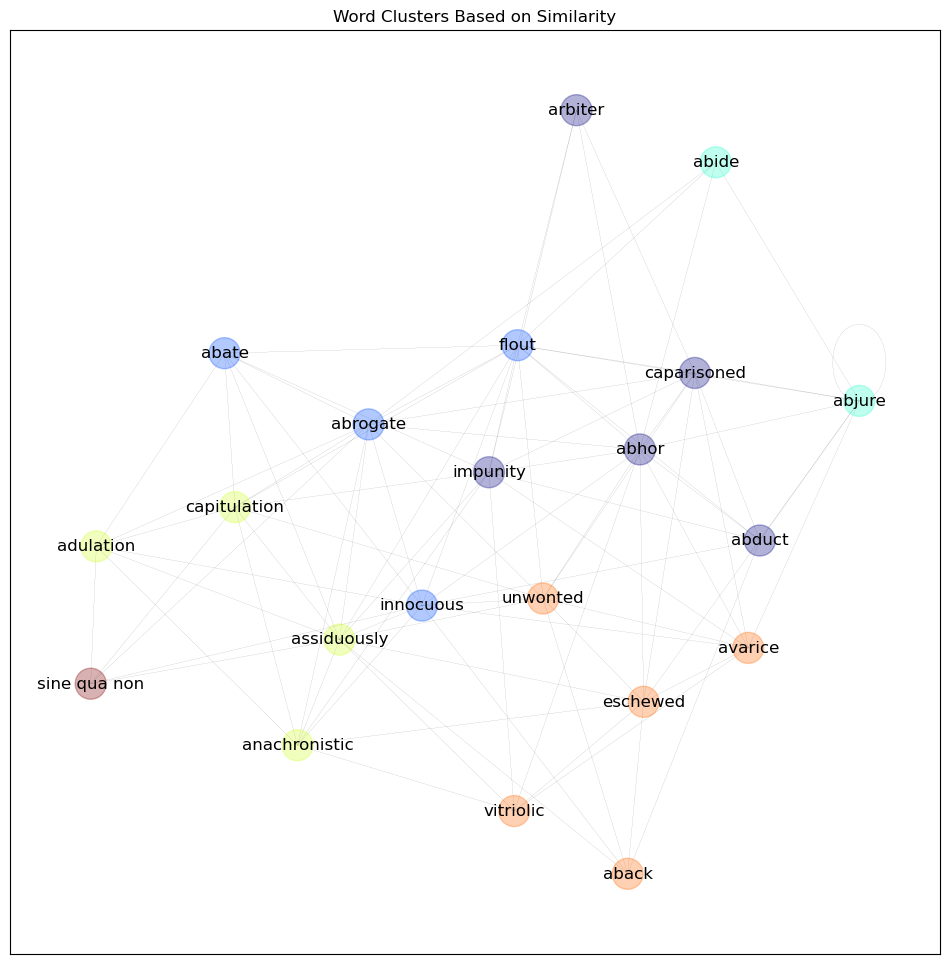

In [49]:
# Add edges based on similarity
for i, word1 in enumerate(spacy_words):
    for j, word2 in enumerate(spacy_words):
        if j > i and similarity_matrix[i, j] > 0.3: # threshold for similarity
            G.add_edge(words[i], words[j])

# Draw the graph with clusters
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)

edges = nx.draw_networkx_edges(G, pos,width=0.05)

# Color map for different clusters
colors = [G.nodes[node]['cluster'] for node in G.nodes]

nodes = nx.draw_networkx_nodes(G, pos,node_color=colors, cmap=plt.cm.jet, node_size=500,alpha=0.3)
labels = nx.draw_networkx_labels(G, pos)

#nx.draw(G, pos,edges)#, node_color=colors, with_labels=True, cmap=plt.cm.jet, node_size=500)


plt.title("Word Clusters Based on Similarity")
plt.show()


In [48]:
import spacy

# Load the medium model with vectors
nlp = spacy.load("en_core_web_md")

# Process two words
word1 = nlp("anachronistic")
word2 = nlp("assiduously")

# Calculate similarity
similarity = word1.similarity(word2)
print(f"Similarity: {similarity}")

Similarity: 0.5258374216730609


In [50]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

# Finding synonyms and antonyms
word = "happy"

synonyms = []
antonyms = []

for syn in wordnet.synsets(word):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

synonyms = set(synonyms)  # Removing duplicates
antonyms = set(antonyms)  # Removing duplicates

print("Synonyms:", synonyms)
print("Antonyms:", antonyms)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


Synonyms: {'felicitous', 'glad', 'well-chosen', 'happy'}
Antonyms: {'unhappy'}


In [53]:
import nltk
import pandas as pd
from nltk.corpus import wordnet

nltk.download('wordnet')

# List of words
words = ["unwonted",  "caparisoned", "innocuous", "capitulation", 
         "flout", "impunity", "sine qua non", "vitriolic", 
         "eschewed", 'abjure', 'adulation', 'anachronistic', 'arbiter', 
         'assiduously', 'avarice', "aback", "abate", 
         "abduct", "abhor", "abide", "abjure", "abrogate"]  # Add your words here

# Initialize an empty list to store the results
data = []

# Process each word
for word in words:
    synonyms = set()
    antonyms = set()

    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())

    # Append the results to the data list
    data.append({'Word': word, 'Synonyms': list(synonyms), 'Antonyms': list(antonyms)})

# Create a DataFrame
df = pd.DataFrame(data)

df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word,Synonyms,Antonyms
0,unwonted,[unwonted],[]
1,caparisoned,"[bard, barde, caparison, caparisoned, dress_up]",[]
2,innocuous,"[innocent, unobjectionable, innocuous]",[noxious]
3,capitulation,"[surrender, capitulation, fall]",[]
4,flout,"[flout, barrack, scoff, jeer, gibe]",[]
5,impunity,[impunity],[]
6,sine qua non,[],[]
7,vitriolic,"[bitter, corrosive, virulent, acerb, acid, cau...",[]
8,eschewed,"[eschew, shun]",[]
9,abjure,"[resile, retract, recant, forswear, abjure]",[]
